In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [ ]:
# 4-2, 4-3
# cross and dot
plt.clf()
ax = plt.axes(projection="3d")
ax.set_box_aspect(aspect=(1, 1, 1))
a = np.array([3, -5, 1])
b = np.array([1, 4, 0])
crossed = np.cross(a, b)

print("a dot   b is", np.dot(a, b))
print("a cross b is", crossed)

size = 10
ax.set_xlim3d(-size, size)
ax.set_ylim3d(-size, size)
ax.set_zlim3d(-size, size)

ax.quiver(0, 0, 0, *a, color="r")
ax.quiver(0, 0, 0, *b, color="b")
ax.quiver(0, 0, 0, *crossed, color="black")

plt.show()

In [ ]:
# 5-1
# summation of 2 2-dimension arrays
plt.clf()
a = np.array([1, 2])
b = np.array([-2, 3])
summ = a + b
sub = a - b
mul = np.array(np.matmul(a, b))

print(f"a + b = {summ}")
print(f"a - b = {sub}")
print(f"a * b = {mul}")

plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.quiver(0, 0, *a, color="black", angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, *b, color="black", angles="xy", scale_units="xy", scale=1)

plt.quiver(0, 0, *summ, color="blue", angles="xy", scale_units="xy", scale=1)
plt.quiver(0, 0, *sub, color="red", angles="xy", scale_units="xy", scale=1)
plt.show()

In [ ]:
# 5-1
# summation of many n-dimension arrays
vectors = np.array([[[1, 2, 3], [2, 4, 6]],
                    [[-2, 5, -3], [2, 7, 4]],
                    [[-1, -7, 4], [4, 5, 8]]])
summ = vectors[0]
for v in vectors[1:]:
    summ += v
print(f"sum = \n{summ}")

In [ ]:
# 5-1
# summation of 2-dimension arrays, then plot it out
plt.clf()
vectors = np.array([[1, 2],
                    [-2, 5],
                    [-1, -7]])

limit_x = np.max(np.abs(vectors), axis=0)[0] * 1.7
limit_y = np.max(np.abs(vectors), axis=0)[1] * 1.7
plt.xlim(-limit_x, limit_x)
plt.ylim(-limit_y, limit_y)

for v in vectors:
    plt.quiver(0, 0, v[0], v[1], color="black", angles="xy", scale_units="xy", scale=1)

summation = vectors[0]
for i in vectors[1:]: summation += i
plt.quiver(0, 0, summation[0], summation[1], color="blue",
           angles="xy", scale_units="xy", scale=1)

plt.show()

In [3]:
from sympy import Matrix, symbols, diff, sin, cos, pprint, init_printing, exp
from sympy.solvers.solveset import linsolve
from sympy.plotting import plot3d_parametric_line
from sympy.vector import CoordSys3D, gradient, divergence, Del, curl
from mpl_toolkits.mplot3d import axes3d

In [ ]:
# 5-3, 5-5
# solve linear algebra, includes inhomogeneous(非齊次) solve
# AX = B, X = (x1, x2, ..., xn)^t, B = (b1, b2, ..., bm)^t
x1, x2, x3, x4 = symbols("x1, x2, x3, x4")
AnB = Matrix([[1, -2, 3, -4, -8],
              [2, 1, 0, 2, 11],
              [1, 1, -1, 2, 7],
              [2, 1, -3, 1, 0]])  # [A|B]
linsolve(AnB, (x1, x2, x3, x4))

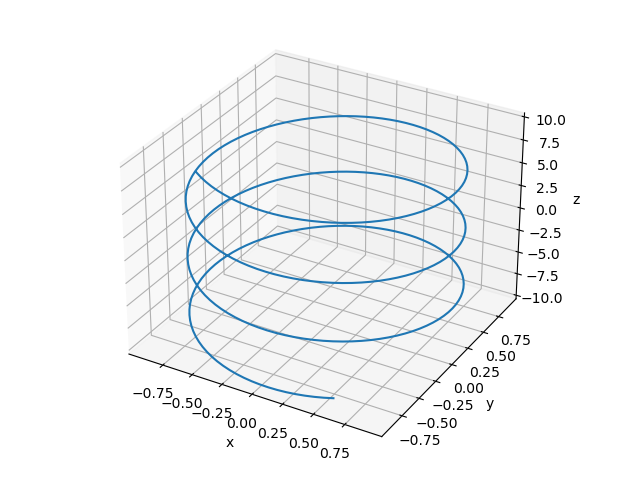

C:\Users\Tom\anaconda3\envs\workspace\lib\site-packages\sympy\plotting\plot.py:1445: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_zlim(zlim)


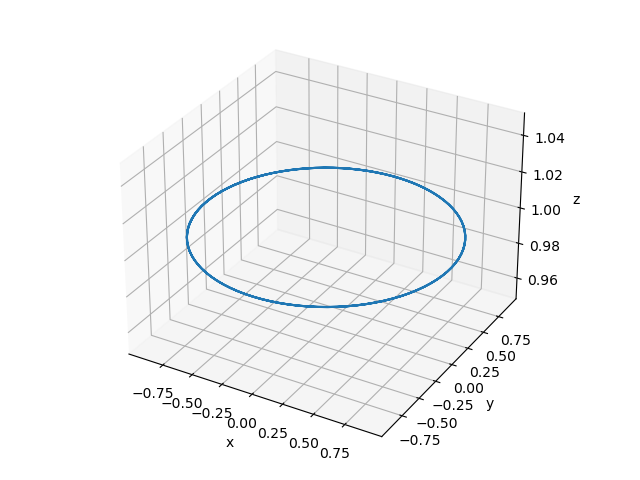

In [32]:
# 6-1
# v(t) = v1(t)i + v2(t)j + v3(t)k
# i, j, k are vectors, (1, 0, 0), (0, 1, 0), (0, 0, 1)
t = symbols("t")
v1_t = sin(t)
v2_t = cos(t)
v3_t = t
v_t = 0
alpha = [v1_t, v2_t, v3_t]
plot3d_parametric_line(*alpha)
diffed = [diff(v1_t, t), diff(v2_t, t), diff(v3_t, t)]
plot3d_parametric_line(*diffed)

          2      2
     - x_R  - y_R 
x_R⋅ℯ             


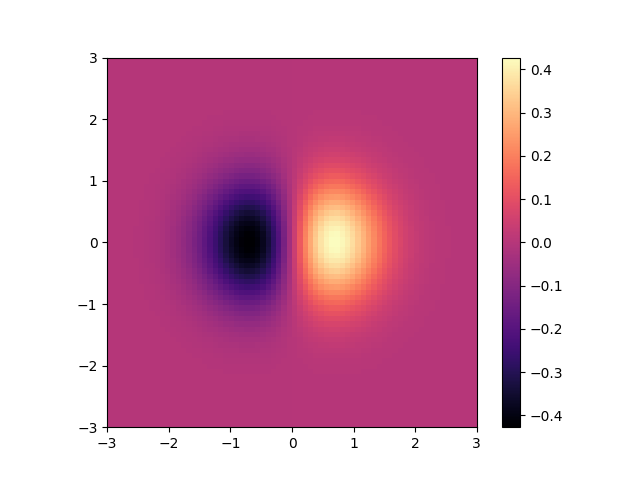

⎛               2      2         2      2⎞       ⎛                 2      2⎞  
⎜       2  - x_R  - y_R     - x_R  - y_R ⎟ i_R + ⎜            - x_R  - y_R ⎟ j
⎝- 2⋅x_R ⋅ℯ              + ℯ             ⎠       ⎝-2⋅x_R⋅y_R⋅ℯ             ⎠  

  
_R
  


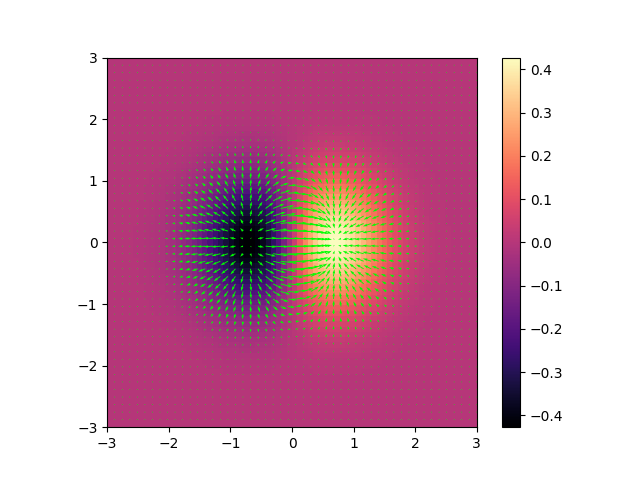

In [7]:
# 什麼是梯度, Del() 的使用

R = CoordSys3D("R")  # 建立實數平面

f = R.x * exp(-(R.x ** 2 + R.y ** 2))  # 定義f(x, y)
pprint(f)  # 輸出f

R4B = 70  # 每行要計算幾個
P = np.zeros((R4B, R4B))  # 建立70x70畫布

X4B, Y4B = np.mgrid[-3:3:R4B * 1j, -3:3:R4B * 1j]  # 在-3~3之間平分R4B個
for i, v in np.ndenumerate(X4B):
    now = f.subs({R.x: v, R.y: Y4B[i]})  # x, y 代入
    P[i[1], i[0]] = now  # 畫上去

plt.clf()  # 清空plt
extent=[-3, 3, -3, 3]  # 設定邊界
plt.imshow(P, extent=extent, cmap="magma")  # 畫到給使用者看的地方
plt.colorbar()  # 色度條
plt.show()  # 給使用者看

delop = Del()  # del operator, 相當於∇
g = delop.gradient(f, doit=True)  # 梯度
pprint(g)  # 輸出g

R4Q = 50  # 每行要計算幾個
X4Q, Y4Q = np.mgrid[-3:3:R4Q * 1j, -3:3:R4Q * 1j]  # 計算所有起點
# 以起點計算終點
X4QV, Y4QV = np.copy(X4Q), np.copy(Y4Q)
for i, v in np.ndenumerate(X4Q):
    now = g.subs({R.x: v, R.y: Y4Q[i]})  # x, y 代入
    now = now.to_matrix(R)  # 將向量函數轉換為矩陣
    X4QV[i], Y4QV[i], _ = now  # 將終點放上去

plt.quiver(X4Q, Y4Q, X4QV, Y4QV, color="lime",
           angles="xy", scale_units="xy", scale=3)  # 畫出箭頭

plt.show()  # 給使用者看

In [ ]:
# 梯度, 直接用gradient()
R = CoordSys3D("R")
coeff_xyz = [2, 3, 4]  # x, y, z
f = coeff_xyz[0] * R.x ** 2 + coeff_xyz[1] * R.y ** 2
g = gradient(f)
pprint(g)

In [4]:
# 方向導數
R = CoordSys3D("R")
coeff_xyz = [2, 3, 4]  # x, y, z
coeff_ijk = [1, 2, -1]  # i, j, k
f = coeff_xyz[0] * R.x ** 2 + coeff_xyz[1] * R.y ** 2 + coeff_xyz[2] * R.z ** 2
g = gradient(f)
del_f = g.subs([(R.x, 1), (R.y, 2), (R.z, 3)])
a = coeff_ijk[0] * R.i + coeff_ijk[1] * R.j + coeff_ijk[2] * R.k
init_printing()

print("f(x, y, z) = ")
pprint(f)
print("\na = ")
pprint(a)
print("\n∇f = ")
pprint(g)
pprint(del_f)
print()

result = (del_f.dot(a)) / (sum([f ** 2 for f in coeff_ijk])) ** 0.5

print("answer is (1 / ||a||) ∇f ⋅ a")
print("result is: ", end="")
pprint(result)

f(x, y, z) = 
     2        2        2
2⋅x_R  + 3⋅y_R  + 4⋅z_R 

a = 
i_R + (2) j_R + (-1) k_R

∇f = 
(4⋅x_R) i_R + (6⋅y_R) j_R + (8⋅z_R) k_R
(4) i_R + (12) j_R + (24) k_R

answer is (1 / ||a||) ∇f ⋅ a
result is: 1.63299316185545


(sin(x_R)) i_R + (cos(y_R)) j_R


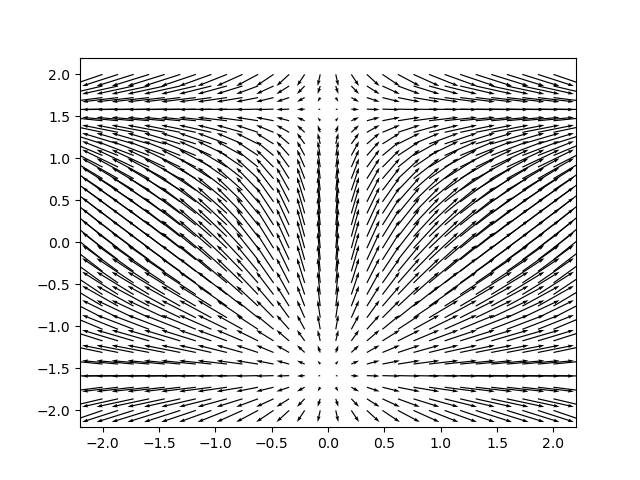

-sin(y_R) + cos(x_R)


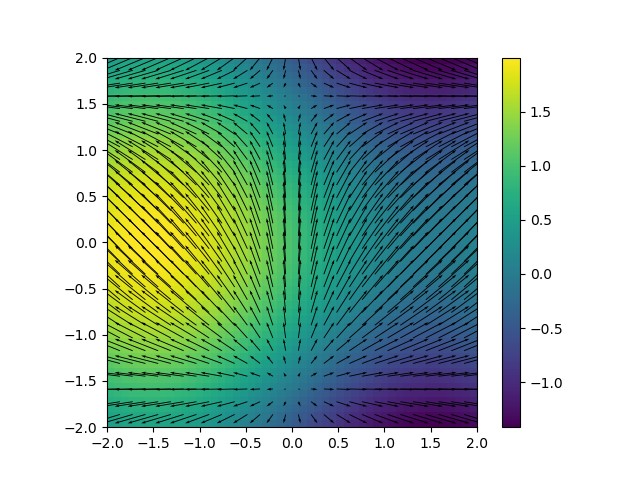

In [20]:
# 什麼是散度
# 散度是∇ ⋅ f


R = CoordSys3D("R")  # 建立實數平面
f = 1 * sin(R.x) * R.i + 1 * cos(R.y) * R.j  # 定義f(x, y)
pprint(f)  # 輸出f

R4Q = 30  # 要每行計算幾個點(解析度)
X4Q, Y4Q = np.mgrid[-2:2:R4Q * 1j, -2:2:R4Q * 1j]  # 計算所有起點
# 以起點帶入f得終點
X4QV, Y4QV = np.copy(X4Q), np.copy(Y4Q)
for i, v in np.ndenumerate(X4Q):
    now = f.subs({R.x: v, R.y: Y4Q[i]}) \
        .to_matrix(R)  # x, y代入並將向量函數轉換為矩陣
    X4QV[i], Y4QV[i], _ = now  # 結果放進去

plt.clf()  # 清空plt
plt.quiver(X4Q, Y4Q, X4QV, Y4QV,
           angles="xy", scale_units="xy", scale=3)  # 畫出箭頭
plt.show()

delop = Del()
d = delop.dot(f, doit=True)  # 散度
pprint(d)  # 輸出d

R4B = 50  # 要每行計算幾個點(解析度)
X4B, Y4B = np.mgrid[-2:2:R4B * 1j, -2:2:R4B * 1j]  # 計算需要計算的點
img = np.zeros((R4B, R4B))  # 建立畫布
extent = [-2, 2, -2, 2]  # 設定邊界
for i, v in np.ndenumerate(X4B):
    now = d.subs({R.x: v, R.y: Y4B[i]})  # x, y 代入
    img[i] = now  # 結果放進去
plt.imshow(img, extent=extent)  # 將img放到plt
plt.colorbar()  # 色度條

plt.show()

In [ ]:
# 散度, 直接用divergence()
d = divergence(f)
pprint(d)

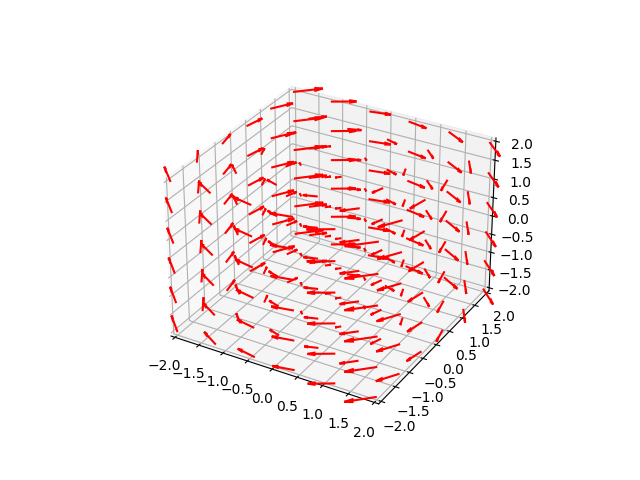

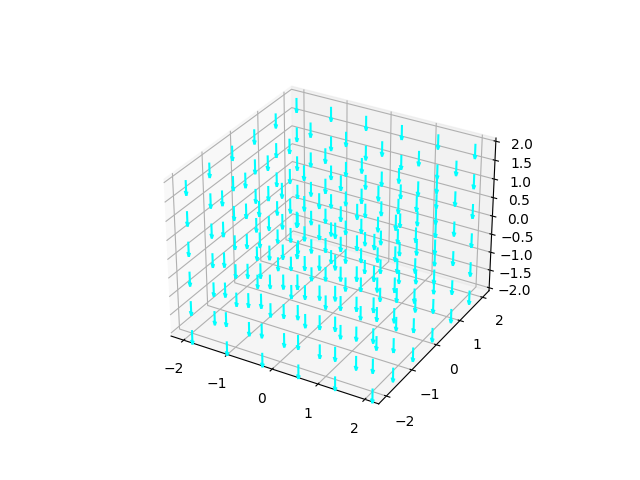

(-2) k_R


In [13]:
# 什麼是旋度
# 旋度是∇ × f
plt.clf()  # 清空plt
# 設定畫布相關細節
ax = plt.axes(projection="3d")  # 畫3d圖
R = CoordSys3D("R")  # 建立實數空間
f = R.y * R.i - R.x * R.j  # 定義f為向量函數
ax.set_xlim((-2, 2))  # 設定x的邊界
ax.set_ylim((-2, 2))  # 設定y的邊界
ax.set_zlim((-2, 2))  # 設定z的邊界

# 原始向量場
X4B, Y4B, Z4B = np.mgrid[-2:2:6j, -2:2:6j, -2:2:6j]  # 計算向量場的向量起點
# 以起點算出向量終點
X4BV, Y4BV, Z4BV = np.copy(X4B), np.copy(Y4B), np.copy(Z4B)
for i, v in np.ndenumerate(X4B):
    now = f.subs({R.x: v, R.y: Y4B[i], R.z: Z4B[i]}).to_matrix(R)[:3]  # 將每一點代入f
    X4BV[i], Y4BV[i], Z4BV[i] = now  # 將結果丟進去畫布裡
ax.quiver(X4B, Y4B, Z4B, X4BV, Y4BV, Z4BV, length=0.2, color="red")  # 畫出原向量場
plt.show()  # 給使用者看

# 旋度向量場
c = delop.cross(f, doit=True)  # 計算f的旋度
X4Q, Y4Q, Z4Q = np.mgrid[-2:2:6j, -2:2:6j, -2:2:6j]  # 計算旋度的向量起點
# 以起點算出向量終點
X4QV, Y4QV, Z4QV = np.copy(X4Q), np.copy(Y4Q), np.copy(Z4Q)
for i, v in np.ndenumerate(X4Q):
    # 將每一點代入c
    now = c.subs({R.x: v, R.y: Y4Q[i], R.z: Z4Q[i]}).to_matrix(R)[:3]
    X4QV[i], Y4QV[i], Z4QV[i] = now  # 將結果丟進去畫布裡

plt.cla()
ax.quiver(X4Q, Y4Q, Z4Q, X4QV, Y4QV, Z4QV, length=0.2, color="cyan")  # 畫出旋度的向量
plt.show()  # 給使用者看
pprint(c)

In [44]:
# 散度, 直接用curl()
c = curl(f)
pprint(c)

⎛     2    2            2⎞        ⎛       2        2        2    ⎞     
⎝4⋅x_R ⋅y_R ⋅z_R - 4⋅z_R ⎠ j_R  + ⎝- 4⋅x_R ⋅y_R⋅z_R  + 9⋅x_R ⋅y_R⎠ k_R 
